In [1]:
import pandas as pd
import glob
import os

DATA_PATH = "../food/*.csv"
file_list = sorted(glob.glob(DATA_PATH))

gender_category_sum = {}


In [ ]:
usecols = [
    "ta_ymd",
    "card_tpbuz_nm_1",
    "card_tpbuz_nm_2",
    "sex",
    "age",
    "amt",
    "cnt"
]

df_list = []

for file in file_list:
    for chunk in pd.read_csv(
        file,
        usecols=usecols,
        chunksize=300_000
    ):
        df_list.append(chunk)

df_all = pd.concat(df_list, ignore_index=True)


In [2]:
for file in file_list:
    print(f"Processing {os.path.basename(file)}")

    for chunk in pd.read_csv(
        file,
        usecols=["sex", "card_tpbuz_nm_2", "amt"],
        chunksize=200_000
    ):
        grouped = (
            chunk
            .groupby(["sex", "card_tpbuz_nm_2"])["amt"]
            .sum()
        )

        for (sex, category), amt in grouped.items():
            key = (sex, category)
            gender_category_sum[key] = gender_category_sum.get(key, 0) + amt


Processing 202201.csv
Processing 202202.csv
Processing 202203.csv
Processing 202204.csv
Processing 202205.csv
Processing 202206.csv
Processing 202207.csv
Processing 202208.csv
Processing 202209.csv
Processing 202210.csv
Processing 202211.csv
Processing 202212.csv
Processing 202301.csv
Processing 202302.csv
Processing 202303.csv
Processing 202304.csv
Processing 202305.csv
Processing 202306.csv
Processing 202307.csv
Processing 202308.csv
Processing 202309.csv
Processing 202310.csv
Processing 202311.csv
Processing 202312.csv
Processing 202401.csv
Processing 202402.csv
Processing 202403.csv
Processing 202404.csv
Processing 202405.csv
Processing 202406.csv
Processing 202407.csv
Processing 202408.csv
Processing 202409.csv
Processing 202410.csv
Processing 202411.csv
Processing 202412.csv
Processing 202501.csv
Processing 202502.csv
Processing 202503.csv
Processing 202504.csv
Processing 202505.csv
Processing 202506.csv
Processing 202507.csv
Processing 202508.csv
Processing 202509.csv
Processing

In [10]:
df_gender_category = (
    pd.DataFrame(
        [
            {"sex": k[0], "category": k[1], "amt": v}
            for k, v in gender_category_sum.items()
        ]
    )
)
df_gender_category

,sex,category,amt
0,F,간이주점,658666775873
1,F,고기요리,2624721220771
2,F,디저트/음료,3430997790326
3,F,별식/퓨전요리,633440783496
4,F,분식,988683532353
5,F,양식,439117046617
6,F,일식/수산물,1489815220735
7,F,중식,500685206242
8,F,패스트푸드,757694684385
9,F,한식,5520218159278


In [4]:
pivot_amt = df_gender_category.pivot(
    index="sex",
    columns="category",
    values="amt"
)


In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

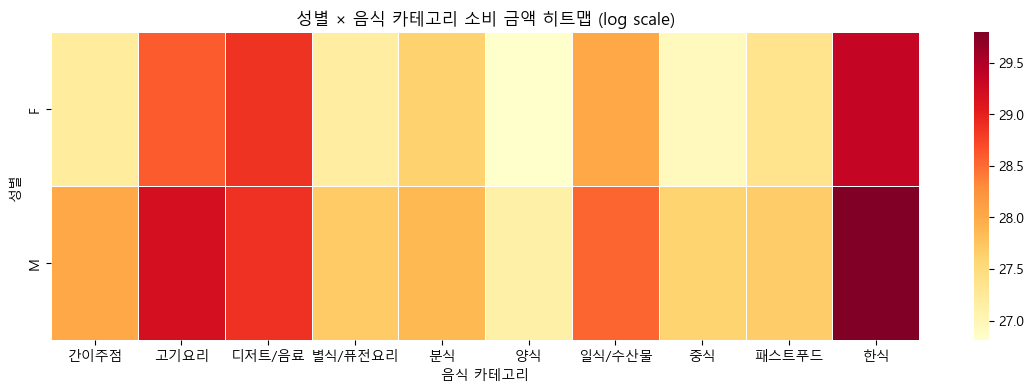

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pivot_log = np.log1p(pivot_amt)

plt.figure(figsize=(14, 4))
sns.heatmap(
    pivot_log,
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("성별 × 음식 카테고리 소비 금액 히트맵 (log scale)")
plt.xlabel("음식 카테고리")
plt.ylabel("성별")
plt.show()


In [1]:
import pandas as pd
import glob
import os

DATA_PATH = "../food/*.csv"
file_list = sorted(glob.glob(DATA_PATH))

monthly_gender_sum = {}


In [2]:
for file in file_list:
    year_month = os.path.basename(file).replace(".csv", "")
    print(f"Processing {year_month}")

    for chunk in pd.read_csv(
        file,
        usecols=["sex", "amt"],
        chunksize=200_000
    ):
        grouped = chunk.groupby("sex")["amt"].sum()

        for sex, amt in grouped.items():
            key = (year_month, sex)
            monthly_gender_sum[key] = monthly_gender_sum.get(key, 0) + amt


Processing 202201
Processing 202202
Processing 202203
Processing 202204
Processing 202205
Processing 202206
Processing 202207
Processing 202208
Processing 202209
Processing 202210
Processing 202211
Processing 202212
Processing 202301
Processing 202302
Processing 202303
Processing 202304
Processing 202305
Processing 202306
Processing 202307
Processing 202308
Processing 202309
Processing 202310
Processing 202311
Processing 202312
Processing 202401
Processing 202402
Processing 202403
Processing 202404
Processing 202405
Processing 202406
Processing 202407
Processing 202408
Processing 202409
Processing 202410
Processing 202411
Processing 202412
Processing 202501
Processing 202502
Processing 202503
Processing 202504
Processing 202505
Processing 202506
Processing 202507
Processing 202508
Processing 202509
Processing 202510
Processing 202511


In [3]:
df_monthly_gender = pd.DataFrame(
    [
        {
            "year_month": k[0],
            "sex": k[1],
            "amt": v
        }
        for k, v in monthly_gender_sum.items()
    ]
)


In [4]:
df_monthly_gender["year_month"] = df_monthly_gender["year_month"].astype(int)

df_monthly_gender = df_monthly_gender.sort_values(
    ["year_month", "sex"]
)


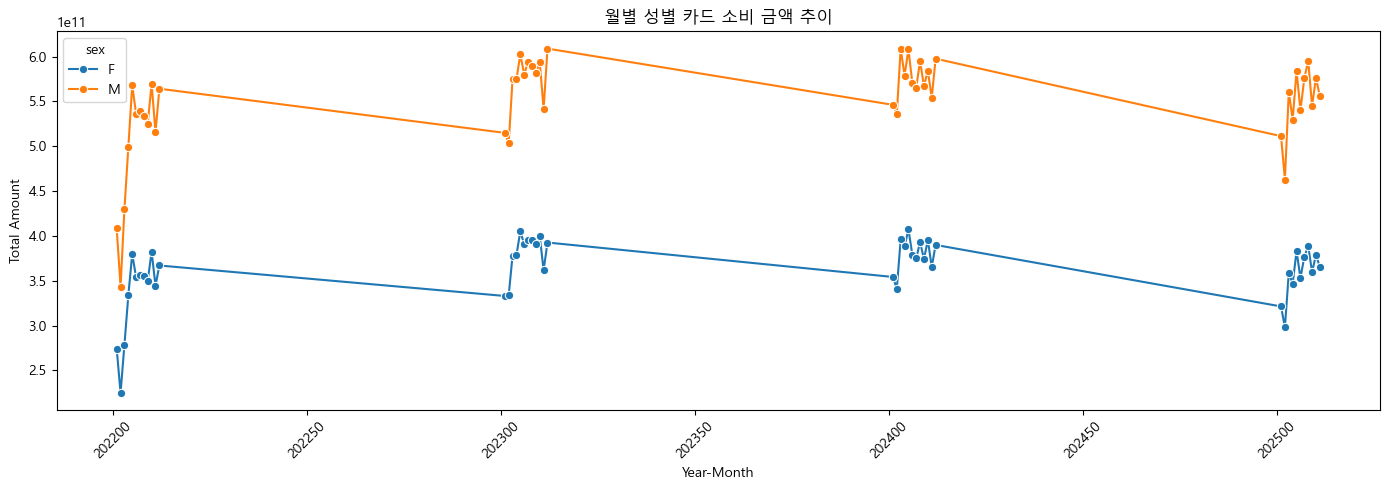

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

sns.lineplot(
    data=df_monthly_gender,
    x="year_month",
    y="amt",
    hue="sex",
    marker="o"
)

plt.title("월별 성별 카드 소비 금액 추이")
plt.xlabel("Year-Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


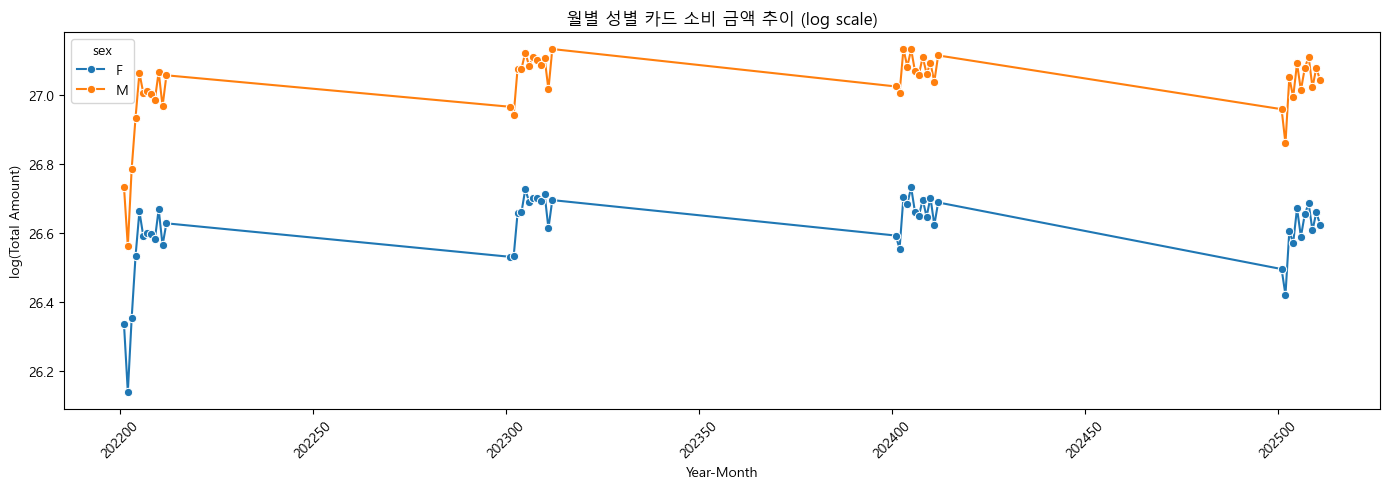

In [8]:
import numpy as np

df_monthly_gender["log_amt"] = np.log1p(df_monthly_gender["amt"])

plt.figure(figsize=(14, 5))
sns.lineplot(
    data=df_monthly_gender,
    x="year_month",
    y="log_amt",
    hue="sex",
    marker="o"
)

plt.title("월별 성별 카드 소비 금액 추이 (log scale)")
plt.xlabel("Year-Month")
plt.ylabel("log(Total Amount)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
